# 13

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)

In [2]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
Weekly=load_data('Weekly')

Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


## (a):TODO:Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [4]:
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [5]:
Weekly.groupby('Direction').describe()

/tmp/ipykernel_1048/2708989981.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Weekly.groupby('Direction').describe()


Year                                                         \
           count         mean       std     min     25%     50%     75%   
Direction                                                                 
Down       484.0  2000.198347  6.001890  1990.0  1995.0  2000.0  2005.0   
Up         605.0  1999.928926  6.060395  1990.0  1995.0  2000.0  2005.0   

                    Lag1            ...    Volume            Today            \
              max  count      mean  ...       75%       max  count      mean   
Direction                           ...                                        
Down       2010.0  484.0  0.282295  ...  2.019929  9.328214  484.0 -1.746585   
Up         2010.0  605.0  0.045217  ...  2.089900  8.403358  605.0  1.667086   

                                                               
                std     min      25%     50%      75%     max  
Direction                                                      
Down       1.759718 -18.195 -2.29275 -1.3345 -0.59175  -0.002  
Up         1.530535   0.010  0.63000  1.2470  2.21500  12.026  

[2 rows x 64 columns]

array([[<Axes: xlabel='Lag1', ylabel='Lag1'>,
        <Axes: xlabel='Lag2', ylabel='Lag1'>,
        <Axes: xlabel='Lag3', ylabel='Lag1'>,
        <Axes: xlabel='Lag4', ylabel='Lag1'>,
        <Axes: xlabel='Lag5', ylabel='Lag1'>,
        <Axes: xlabel='Volume', ylabel='Lag1'>,
        <Axes: xlabel='Today', ylabel='Lag1'>],
       [<Axes: xlabel='Lag1', ylabel='Lag2'>,
        <Axes: xlabel='Lag2', ylabel='Lag2'>,
        <Axes: xlabel='Lag3', ylabel='Lag2'>,
        <Axes: xlabel='Lag4', ylabel='Lag2'>,
        <Axes: xlabel='Lag5', ylabel='Lag2'>,
        <Axes: xlabel='Volume', ylabel='Lag2'>,
        <Axes: xlabel='Today', ylabel='Lag2'>],
       [<Axes: xlabel='Lag1', ylabel='Lag3'>,
        <Axes: xlabel='Lag2', ylabel='Lag3'>,
        <Axes: xlabel='Lag3', ylabel='Lag3'>,
        <Axes: xlabel='Lag4', ylabel='Lag3'>,
        <Axes: xlabel='Lag5', ylabel='Lag3'>,
        <Axes: xlabel='Volume', ylabel='Lag3'>,
        <Axes: xlabel='Today', ylabel='Lag3'>],
       [<Axes: xlabel=

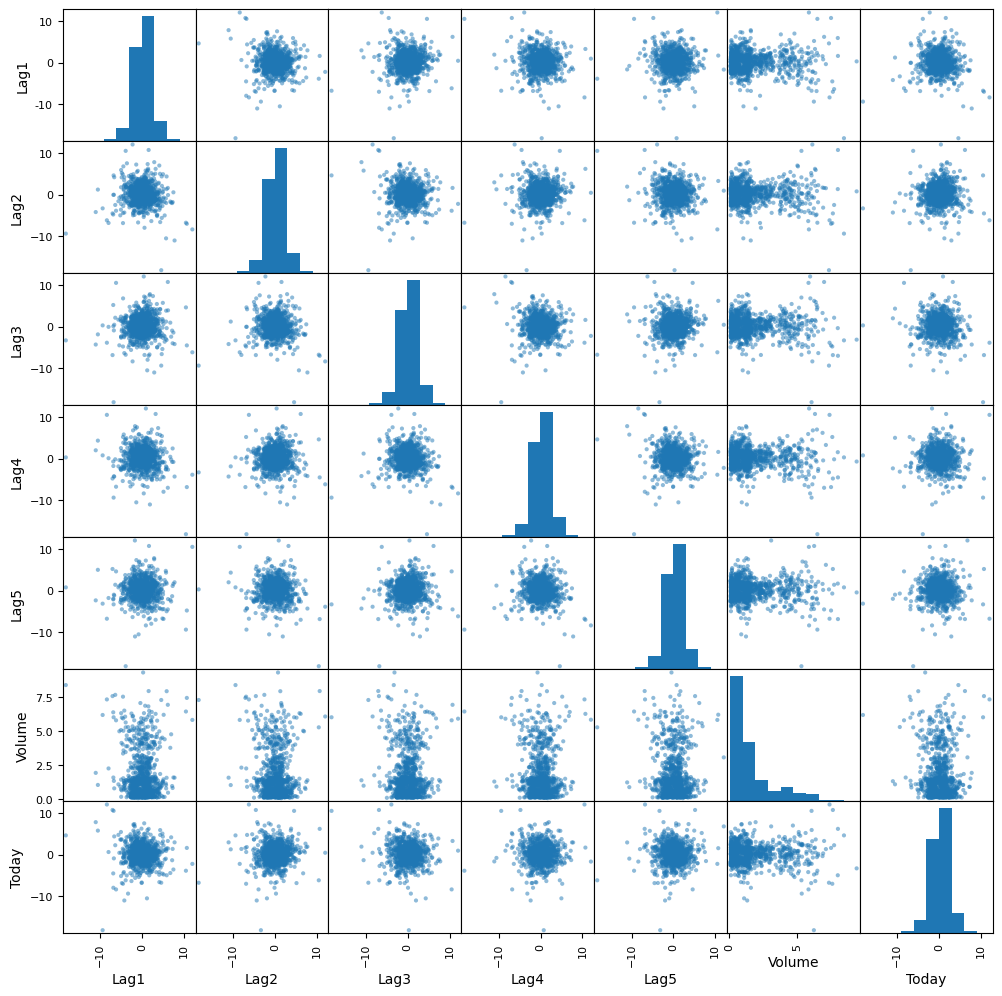

In [6]:
pd.plotting.scatter_matrix(Weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']], 
                           figsize=(12, 12))

<Axes: >

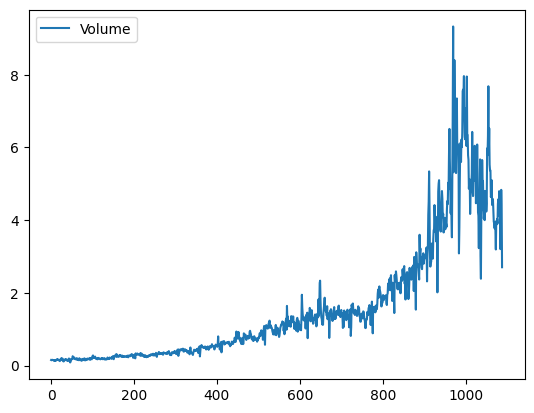

In [7]:
Weekly.plot(y='Volume')

## (b)TODO: Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [8]:
allvars=Weekly.columns.drop(['Year','Direction','Today'])
design=MS(allvars)

X=design.fit_transform(Weekly)
y=Weekly.Direction=='Up'

glm=sm.GLM(y,X,family=sm.families.Binomial())

result=glm.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Mon, 03 Nov 2025   Deviance:                       1486.4
Time:                        19:42:16   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

## Lag2 appears to be statistically significant.

## (c):TODO Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [9]:
probs=result.predict()
probs

array([0.60862494, 0.60103144, 0.58756995, ..., 0.57972297, 0.55091703,
       0.52212163], shape=(1089,))

In [10]:
labels=np.array(['Down']*1089)
labels[probs>0.5]="Up"

confusion_table(labels,Weekly.Direction)





Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


## 91.7% of all predictions are 'up'.

## (d):Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [11]:
train=(Weekly.Year<=2008)
design_lag2=MS(['Lag2'])
X_train=design_lag2.fit_transform(Weekly[train])
X_test=design_lag2.fit_transform(Weekly[~train])
X_train,X_test=[M.drop(columns=['intercept']) for M in [X_train,X_test]]
y_train,y_test=y[train],y[~train]

glm=sm.GLM(y_train,X_train,family=sm.families.Binomial())

result=glm.fit()

probs=result.predict(exog=X_test)

probs


985     0.473327
986     0.604717
987     0.430515
988     0.429436
989     0.466450
          ...   
1084    0.500676
1085    0.486466
1086    0.546547
1087    0.520131
1088    0.504450
Length: 104, dtype: float64

In [12]:
D=Weekly.Direction
L_train,L_test=D[train],D[~train]

In [13]:
labels=np.array(['Down']*104)
labels[probs>0.5]='Up'
confusion_table(labels,L_test)

Truth,Down,Up
Predicted,,
Down,20,24
Up,23,37


In [14]:
np.mean(labels==L_test)

np.float64(0.5480769230769231)

## (e):TODO Repeat (d) using LDA.

In [15]:
lda=LDA(store_covariance=True)


In [16]:
lda.fit(X_train,L_train)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,True
,tol,0.0001
,covariance_estimator,None


In [17]:
lda.means_

array([[-0.03568254],
       [ 0.26036581]])

In [18]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [19]:
lda_pred=lda.predict(X_test)

In [20]:
confusion_table(lda_pred,L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [21]:
np.mean(lda_pred==L_test)

np.float64(0.625)

## (f):TODO Repeat (d) using QDA.

In [22]:
qda=QDA(store_covariance=True)

qda.fit(X_train,L_train)

,priors,None
,reg_param,0.0
,store_covariance,True
,tol,0.0001


In [23]:
qda.means_,qda.priors_

(array([[-0.03568254],
        [ 0.26036581]]),
 array([0.44771574, 0.55228426]))

In [24]:
qda.covariance_[0]

array([[4.83781758]])

In [25]:
qda_pred=qda.predict(X_test)

confusion_table(qda_pred,L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [26]:
np.mean(qda_pred==L_test)

np.float64(0.5865384615384616)

## (g):TODO Repeat (d) using KNN with K=1.

In [27]:
knn1=KNeighborsClassifier(n_neighbors=1)

knn1.fit(X_train,L_train)

knn1_pred=knn1.predict(X_test)

confusion_table(knn1_pred,L_test)

Truth,Down,Up
Predicted,,
Down,22,32
Up,21,29


In [28]:
np.mean(knn1_pred==L_test)

np.float64(0.49038461538461536)

## (h):TODO Repeat (d) using naive Bayes.

In [29]:
NB=GaussianNB()

NB.fit(X_train,L_train)

,priors,None
,var_smoothing,1e-09


In [30]:
nb_labels=NB.predict(X_test)
confusion_table(nb_labels,L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [31]:
np.mean(nb_labels==L_test)

np.float64(0.5865384615384616)

## (i) TODO:Which of these methods appears to provide the best results on this data?

## LDA is the best, since it has the accuracy of 62.5%

# 14

# In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set

# (a):TODO Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment. Assuming you have stored the data frame as Auto, this can be done as follows:

In [54]:
Auto=load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [68]:
mpg_median=Auto[['mpg']].median()
mpg_median

mpg    22.75
dtype: float64

In [69]:
mpg01=(Auto['mpg']>mpg_median['mpg']).astype(int)

Auto['mpg01']=mpg01

Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2,1
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1,1


# (b):TODO Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

In [70]:
# 分组统计
Auto.groupby('mpg01')[['displacement', 'horsepower', 'weight', 
                       'acceleration', 'year']].describe()

displacement                                                           \
             count        mean        std   min    25%    50%    75%    max   
mpg01                                                                         
0            196.0  273.158163  89.523986  70.0  225.0  261.0  350.0  455.0   
1            196.0  115.665816  38.429513  68.0   91.0  105.0  134.0  350.0   

      horsepower              ... acceleration         year             \
           count        mean  ...          75%   max  count       mean   
mpg01                         ...                                        
0          196.0  130.112245  ...       16.250  21.9  196.0  74.397959   
1          196.0   78.826531  ...       17.925  24.8  196.0  77.561224   

                                               
            std   min   25%   50%   75%   max  
mpg01                                          
0      2.970763  70.0  72.0  74.0  77.0  82.0  
1      3.654478  70.0  75.0  78.0  81.0  82.0  

[2 rows x 40 columns]

/tmp/ipykernel_1048/4154300855.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data_to_plot, labels=['mpg01=0', 'mpg01=1'])
/tmp/ipykernel_1048/4154300855.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data_to_plot, labels=['mpg01=0', 'mpg01=1'])
/tmp/ipykernel_1048/4154300855.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data_to_plot, labels=['mpg01=0', 'mpg01=1'])
/tmp/ipykernel_1048/4154300855.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be 

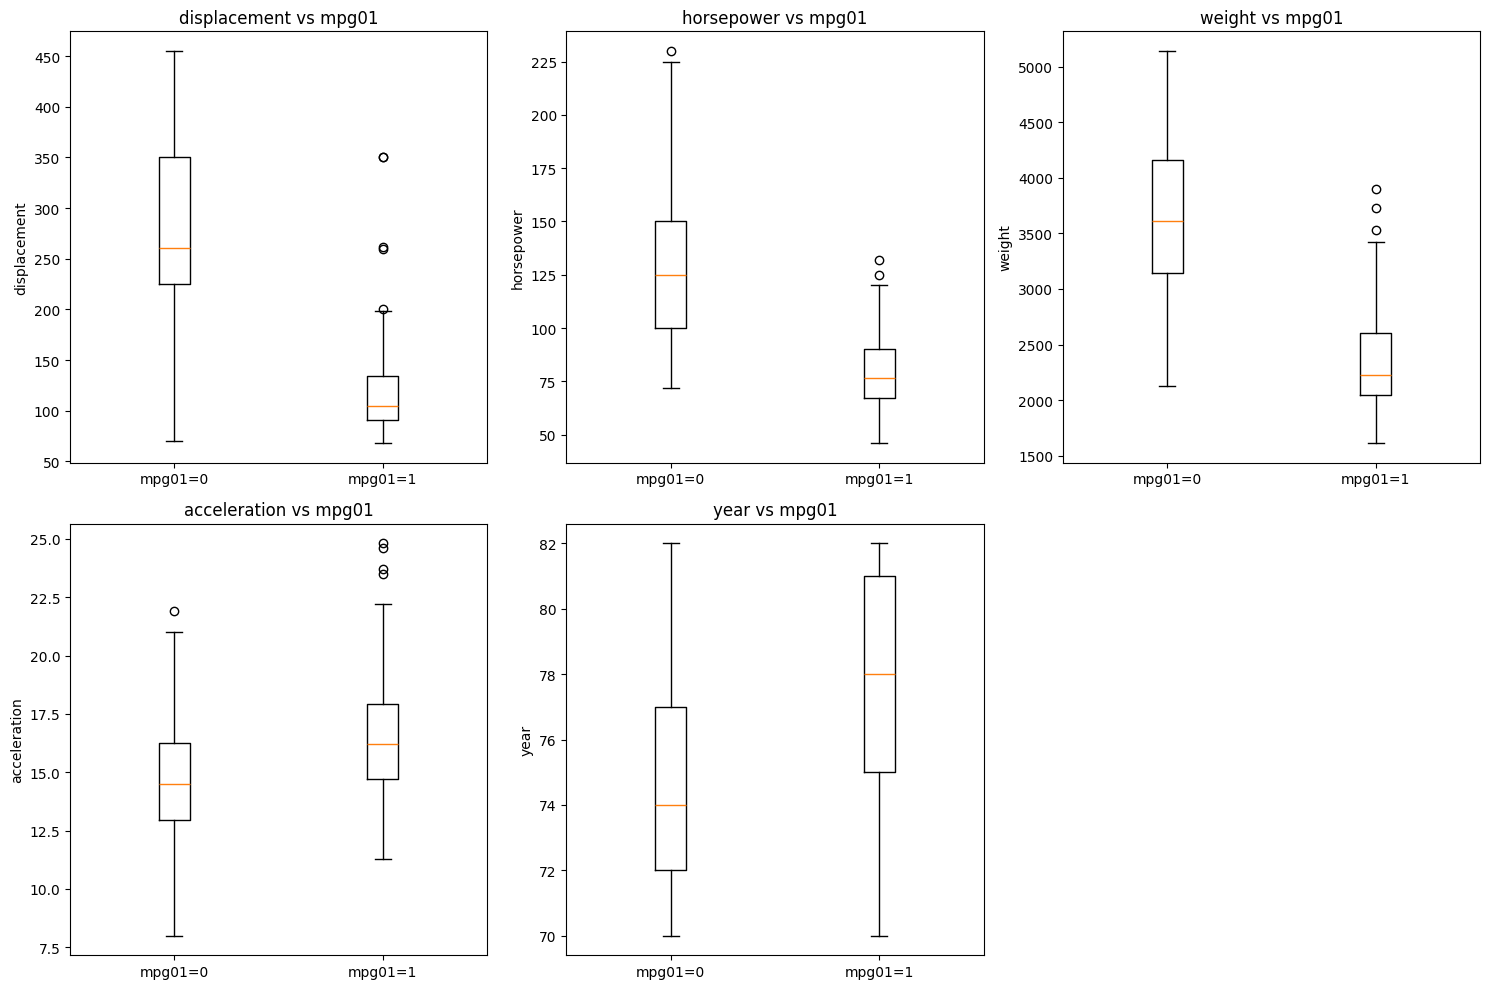

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# 连续特征列表（除了mpg本身，因为它和mpg01直接相关）
continuous_features = ['displacement', 'horsepower', 'weight', 'acceleration', 'year']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(continuous_features):
    # 按 mpg01 分组绘制箱线图
    data_to_plot = [Auto[Auto['mpg01']==0][feature], 
                     Auto[Auto['mpg01']==1][feature]]
    axes[i].boxplot(data_to_plot, labels=['mpg01=0', 'mpg01=1'])
    axes[i].set_title(f'{feature} vs mpg01')
    axes[i].set_ylabel(feature)

# 隐藏多余的子图
axes[-1].axis('off')
plt.tight_layout()
plt.show()

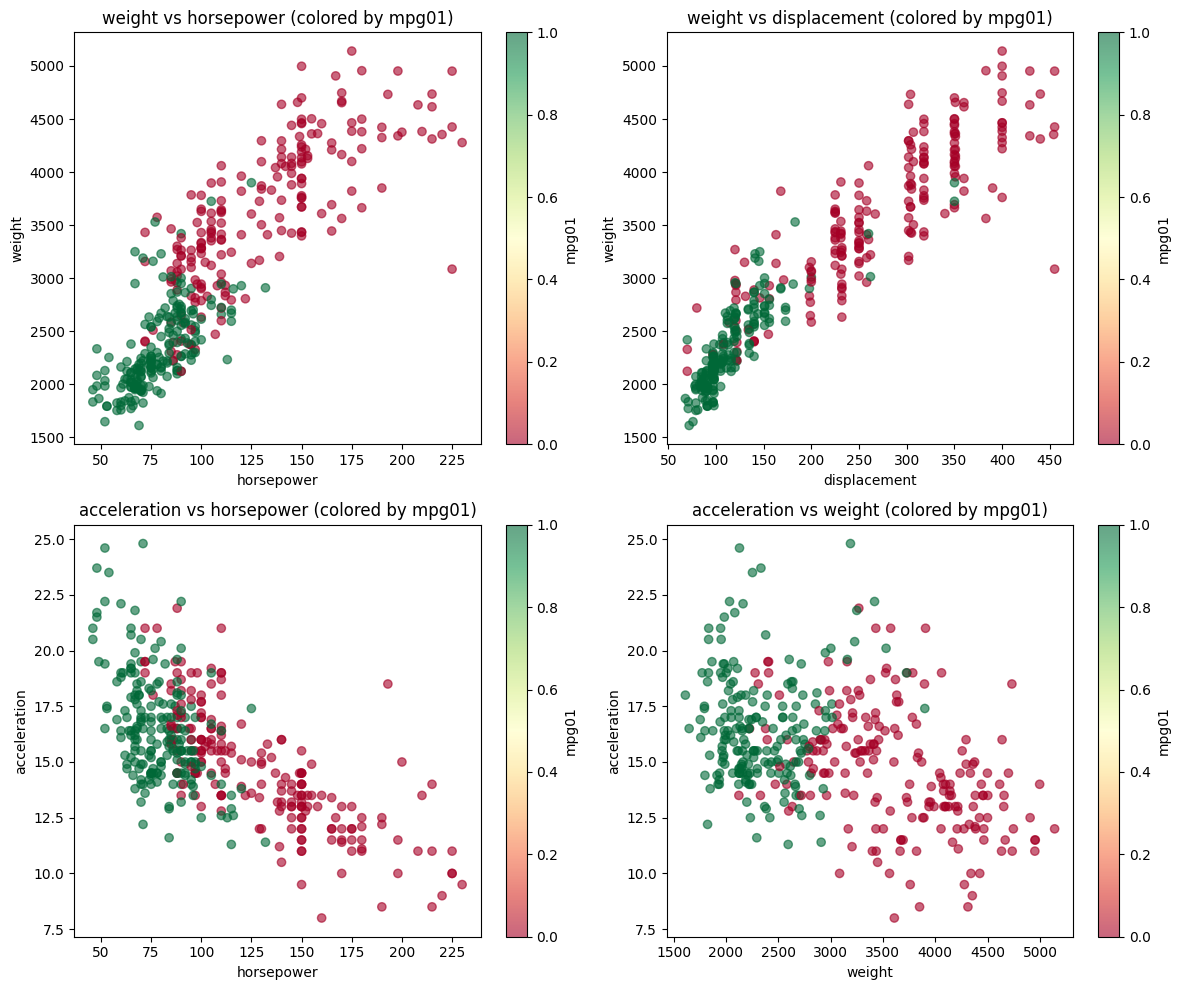

In [72]:
# 绘制散点图矩阵，用颜色区分 mpg01
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# weight vs horsepower
scatter1 = axes[0, 0].scatter(Auto['horsepower'], Auto['weight'], 
                              c=Auto['mpg01'], cmap='RdYlGn', alpha=0.6)
axes[0, 0].set_xlabel('horsepower')
axes[0, 0].set_ylabel('weight')
axes[0, 0].set_title('weight vs horsepower (colored by mpg01)')
plt.colorbar(scatter1, ax=axes[0, 0], label='mpg01')

# displacement vs weight
scatter2 = axes[0, 1].scatter(Auto['displacement'], Auto['weight'], 
                              c=Auto['mpg01'], cmap='RdYlGn', alpha=0.6)
axes[0, 1].set_xlabel('displacement')
axes[0, 1].set_ylabel('weight')
axes[0, 1].set_title('weight vs displacement (colored by mpg01)')
plt.colorbar(scatter2, ax=axes[0, 1], label='mpg01')

# horsepower vs acceleration
scatter3 = axes[1, 0].scatter(Auto['horsepower'], Auto['acceleration'], 
                              c=Auto['mpg01'], cmap='RdYlGn', alpha=0.6)
axes[1, 0].set_xlabel('horsepower')
axes[1, 0].set_ylabel('acceleration')
axes[1, 0].set_title('acceleration vs horsepower (colored by mpg01)')
plt.colorbar(scatter3, ax=axes[1, 0], label='mpg01')

# weight vs acceleration
scatter4 = axes[1, 1].scatter(Auto['weight'], Auto['acceleration'], 
                              c=Auto['mpg01'], cmap='RdYlGn', alpha=0.6)
axes[1, 1].set_xlabel('weight')
axes[1, 1].set_ylabel('acceleration')
axes[1, 1].set_title('acceleration vs weight (colored by mpg01)')
plt.colorbar(scatter4, ax=axes[1, 1], label='mpg01')

plt.tight_layout()
plt.show()

# Year,Horsepower,Displacement,Weight are the useful features.

# (c):TODO Split the data into a training set and a test set.

In [73]:
Label=Auto['mpg01']
Label

name
chevrolet chevelle malibu    0
buick skylark 320            0
plymouth satellite           0
amc rebel sst                0
ford torino                  0
                            ..
ford mustang gl              1
vw pickup                    1
dodge rampage                1
ford ranger                  1
chevy s-10                   1
Name: mpg01, Length: 392, dtype: int64

In [74]:
Auto_data=Auto.drop(columns=['mpg01'])
Auto_data=Auto_data[['displacement']]

In [75]:
train_set,test_set=train_test_split(Auto_data,test_size=0.1)

train_set


,displacement
name,
dodge monaco (sw),383.0
chevrolet cavalier 2-door,112.0
datsun f-10 hatchback,85.0
dodge d100,318.0
oldsmobile omega,350.0
...,...
amc rebel sst,304.0
datsun b-210,85.0
ford maverick,250.0


In [76]:
test_set

,displacement
name,
amc ambassador sst,304.0
ford ltd,351.0
plymouth reliant,135.0
ford pinto,122.0
amc ambassador brougham,360.0
toyota corona,134.0
mazda glc custom l,91.0
volkswagen rabbit l,105.0
chevy c10,350.0


In [77]:
train_label,test_label=train_test_split(Label,test_size=0.1)

train_label

name
renault 12 (sw)              1
chrysler lebaron salon       0
plymouth satellite custom    0
ford pinto                   1
toyota corolla               1
                            ..
opel manta                   1
plymouth grand fury          0
ford escort 4w               1
volkswagen rabbit            1
pontiac phoenix              1
Name: mpg01, Length: 352, dtype: int64

In [78]:
test_label

name
plymouth horizon                     1
datsun 310                           1
chevrolet malibu classic (sw)        0
mercury monarch                      0
toyota cressida                      1
vw rabbit                            1
chrysler lebaron medallion           1
plymouth satellite custom (sw)       0
mazda rx2 coupe                      0
oldsmobile cutlass ciera (diesel)    1
datsun b210 gx                       1
chevrolet monte carlo landau         0
chevrolet cavalier wagon             1
pontiac phoenix lj                   0
peugeot 304                          1
volkswagen dasher                    1
buick century luxus (sw)             0
toyota tercel                        1
dodge colt hardtop                   1
buick skylark 320                    0
datsun 280-zx                        1
dodge coronet custom (sw)            0
toyota celica gt liftback            0
volkswagen rabbit custom             1
amc hornet                           0
dodge coronet custom

In [79]:
lda=LDA(store_covariance=True)

lda.fit(train_set,train_label)

lda_pred=lda.predict(test_set)

confusion_table(lda_pred,test_label)




Truth,0,1
Predicted,,
0,12,8
1,11,9


In [80]:
test_error=np.mean(lda_pred!=test_label)

In [81]:
test_error

np.float64(0.475)

# (e):TODO Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [88]:
qda=QDA(store_covariance=True)

qda.fit(train_set,train_label)

qda_pred=qda.predict(test_set)

confusion_table(qda_pred,test_label)




Truth,0,1
Predicted,,
0,11,7
1,12,10


In [89]:
test_error=np.mean(qda_pred!=test_label)

In [90]:
test_error

np.float64(0.475)

# (f):TODO Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [97]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

logistic.fit(train_set,train_label)

logistic_pred=logistic.predict(test_set)

logistic_pred


array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0])

In [98]:
confusion_table(logistic_pred,test_label)

Truth,0,1
Predicted,,
0,12,8
1,11,9


In [99]:
test_error=np.mean(logistic_pred!=test_label)

In [100]:
test_error

np.float64(0.475)

# (g):TODO Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [101]:
from sklearn import naive_bayes

In [102]:
nbayes=naive_bayes.GaussianNB()

In [103]:
nbayes.fit(train_set,train_label)
nbayes_pred=nbayes.predict(test_set)

nbayes_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0])

In [104]:
test_error=np.mean(nbayes_pred!=test_label)

test_error

np.float64(0.475)

# (h):TODO Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
knn=KNeighborsClassifier()

knn.fit(train_set,train_label)

knn_pred=knn.predict(test_set)

knn_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [110]:
test_error=np.mean(knn_pred!=test_label)

test_error

np.float64(0.425)

# 15 Writing Functions

# (a) TODO:Write a function, Power(), that prints out the result of raising 2 to the 3rd power. In other words, your function should compute 2^3 and print out the results.

In [112]:
def Power():
    return 2**3

print(Power())

8


# (b):TODO Create a new function, Power2(), that allows you to pass any two numbers, x and a, and prints out the value of x**a

In [114]:
def Power2(x,a):
    if a==0:
        return 1

    else:
        return x*Power2(x,a-1)

print(Power2(3,8))

6561


# (c):TODO Now create a new function, Power3(), that actually returns the result x**a as a Python object, rather than simply printing it to the screen.

In [115]:
def Power3(x,a):
    if a==0:
        return 1

    else:
        return x*Power3(x,a-1)

print(Power3(3,8))

6561


# (e):TODO Now using the Power3() function, create a plot of f(x) = x^2 

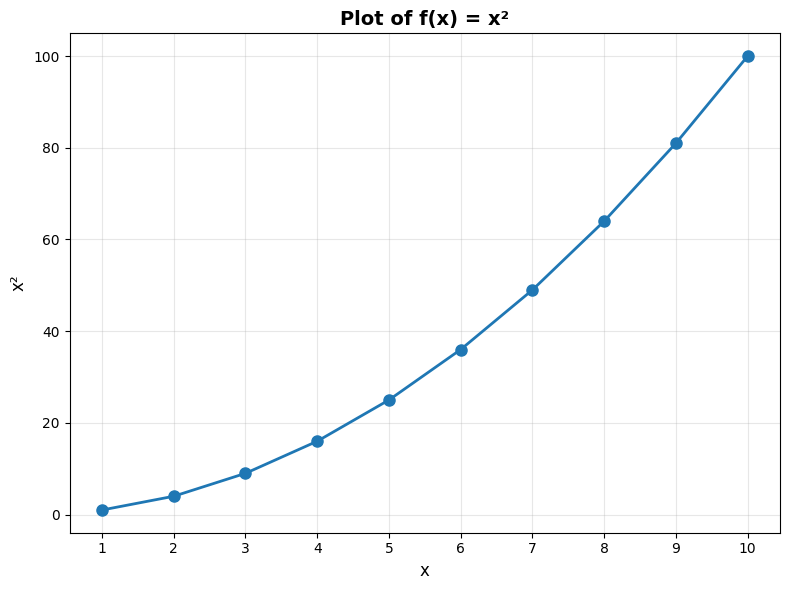

In [116]:
import matplotlib.pyplot as plt
import numpy as np



# 创建 x 值：1 到 10 的整数
x = np.arange(1, 11)  # 或者 x = range(1, 11)

# 使用 Power3() 函数计算 f(x) = x^2
y = [Power3(xi, 2) for xi in x]  # 或者 y = Power3(x, 2) 如果 Power3 支持向量化

# 创建图形和轴
fig, ax = plt.subplots(figsize=(8, 6))

# 绘制图形
ax.plot(x, y, marker='o', linewidth=2, markersize=8)

# 设置坐标轴标签
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('x²', fontsize=12)

# 设置标题
ax.set_title('Plot of f(x) = x²', fontsize=14, fontweight='bold')

# 设置 x 轴刻度为整数
ax.set_xticks(x)

# 可选：使用对数刻度（你可以根据需要选择 x 轴、y 轴或两者）
# ax.set_xscale('log')  # x 轴对数刻度
# ax.set_yscale('log')  # y 轴对数刻度
# 或者两者都使用：
# ax.set_xscale('log')
# ax.set_yscale('log')

# 添加网格
ax.grid(True, alpha=0.3)

# 显示图形
plt.tight_layout()
plt.show()

# (f):TODO Create a function, PlotPower(), that allows you to create a plot of x against x**a for a fixed a and a sequence of values of x. 

In [117]:
def PlotPower(x, a):
    """
    Create a plot of x against x**a.
    
    Parameters:
    -----------
    x : array-like
        Sequence of x values
    a : float
        Power value
        
    Returns:
    --------
    fig, ax : matplotlib figure and axes objects
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Convert x to numpy array if it isn't already
    x = np.array(x)
    
    # Calculate y = x**a
    y = x**a
    
    # Create the plot
    fig, ax = subplots(figsize=(8, 6))
    
    # Plot x against x**a
    ax.plot(x, y, marker='o', linewidth=2, markersize=8)
    
    # Set labels and title
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel(f'x^{a}', fontsize=12)
    ax.set_title(f'Plot of x against x^{a}', fontsize=14, fontweight='bold')
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax

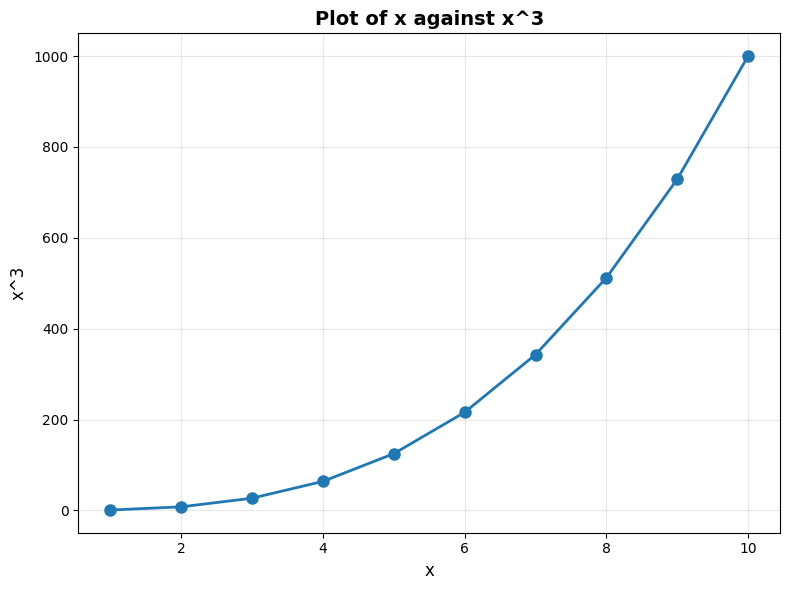

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Plot of x against x^3'}, xlabel='x', ylabel='x^3'>)

In [118]:
PlotPower(np.arange(1, 11), 3)

# 16 TODO:Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, naive Bayes, and KNN models using various subsets of the predictors. Describe your findings.

In [119]:
# Load Boston data
Boston = load_data('Boston')
Boston.head()

# Check the structure
Boston.info()
Boston.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [126]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,high_crime
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


In [120]:
# Create binary classification target based on median crime rate
# 'crim' is the crime rate column
median_crime = Boston['crim'].median()
Boston['high_crime'] = (Boston['crim'] > median_crime).astype(int)

# Check the distribution
print(f"Median crime rate: {median_crime:.4f}")
print(f"\nHigh crime count: {Boston['high_crime'].sum()}")
print(f"Low crime count: {(~Boston['high_crime'].astype(bool)).sum()}")

Median crime rate: 0.2565

High crime count: 253
Low crime count: 253


In [121]:
# Split into train and test sets
X = Boston.drop(['crim', 'high_crime'], axis=1)  # All predictors except crime
y = Boston['high_crime']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for LDA, KNN, and logistic regression with regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

In [122]:
# Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)
logreg_pred = logreg.predict(X_test_scaled)
logreg_proba = logreg.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression:")
print(confusion_table(y_test, logreg_pred))
print(f"Test Accuracy: {(y_test == logreg_pred).mean():.4f}\n")

# LDA
lda = LDA()
lda.fit(X_train_scaled, y_train)
lda_pred = lda.predict(X_test_scaled)
lda_proba = lda.predict_proba(X_test_scaled)[:, 1]

print("LDA:")
print(confusion_table(y_test, lda_pred))
print(f"Test Accuracy: {(y_test == lda_pred).mean():.4f}\n")

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_pred = nb.predict(X_test_scaled)
nb_proba = nb.predict_proba(X_test_scaled)[:, 1]

print("Naive Bayes:")
print(confusion_table(y_test, nb_pred))
print(f"Test Accuracy: {(y_test == nb_pred).mean():.4f}\n")

# KNN (try different values of k)
for k in [1, 3, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    knn_pred = knn.predict(X_test_scaled)
    
    print(f"KNN (k={k}):")
    print(confusion_table(y_test, knn_pred))
    print(f"Test Accuracy: {(y_test == knn_pred).mean():.4f}\n")

Logistic Regression:
Truth       0   1
Predicted        
0          72   4
1          20  56
Test Accuracy: 0.8421

LDA:
Truth       0   1
Predicted        
0          74   2
1          23  53
Test Accuracy: 0.8355

Naive Bayes:
Truth       0   1
Predicted        
0          66  10
1          16  60
Test Accuracy: 0.8289

KNN (k=1):
Truth       0   1
Predicted        
0          72   4
1           9  67
Test Accuracy: 0.9145

KNN (k=3):
Truth       0   1
Predicted        
0          74   2
1          12  64
Test Accuracy: 0.9079

KNN (k=5):
Truth       0   1
Predicted        
0          73   3
1          12  64
Test Accuracy: 0.9013

KNN (k=10):
Truth       0   1
Predicted        
0          72   4
1          16  60
Test Accuracy: 0.8684



In [123]:
# Define predictor subsets
predictor_subsets = {
    'All': X.columns.tolist(),
    'Socioeconomic': ['indus', 'nox', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv'],
    'Geographic': ['zn', 'indus', 'rad', 'tax'],
    'Housing': ['rm', 'age', 'dis', 'rad', 'tax', 'ptratio'],
    'Economic': ['indus', 'nox', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv'],
    'Top 5': ['nox', 'age', 'dis', 'rad', 'lstat'],  # Based on correlation or feature importance
}

results = {}

for subset_name, predictors in predictor_subsets.items():
    print(f"\n{'='*50}")
    print(f"Predictor Subset: {subset_name}")
    print(f"{'='*50}")
    
    X_train_subset = X_train_scaled[predictors]
    X_test_subset = X_test_scaled[predictors]
    
    subset_results = {}
    
    # Logistic Regression
    logreg = LogisticRegression(random_state=42, max_iter=1000)
    logreg.fit(X_train_subset, y_train)
    logreg_pred = logreg.predict(X_test_subset)
    logreg_acc = (y_test == logreg_pred).mean()
    subset_results['Logistic'] = logreg_acc
    print(f"Logistic Regression Accuracy: {logreg_acc:.4f}")
    
    # LDA
    lda = LDA()
    lda.fit(X_train_subset, y_train)
    lda_pred = lda.predict(X_test_subset)
    lda_acc = (y_test == lda_pred).mean()
    subset_results['LDA'] = lda_acc
    print(f"LDA Accuracy: {lda_acc:.4f}")
    
    # Naive Bayes
    nb = GaussianNB()
    nb.fit(X_train_subset, y_train)
    nb_pred = nb.predict(X_test_subset)
    nb_acc = (y_test == nb_pred).mean()
    subset_results['NaiveBayes'] = nb_acc
    print(f"Naive Bayes Accuracy: {nb_acc:.4f}")
    
    # KNN (k=5)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_subset, y_train)
    knn_pred = knn.predict(X_test_subset)
    knn_acc = (y_test == knn_pred).mean()
    subset_results['KNN'] = knn_acc
    print(f"KNN (k=5) Accuracy: {knn_acc:.4f}")
    
    results[subset_name] = subset_results


Predictor Subset: All
Logistic Regression Accuracy: 0.8421
LDA Accuracy: 0.8355
Naive Bayes Accuracy: 0.8289
KNN (k=5) Accuracy: 0.9013

Predictor Subset: Socioeconomic
Logistic Regression Accuracy: 0.8487
LDA Accuracy: 0.8355
Naive Bayes Accuracy: 0.8158
KNN (k=5) Accuracy: 0.9145

Predictor Subset: Geographic
Logistic Regression Accuracy: 0.7895
LDA Accuracy: 0.8158
Naive Bayes Accuracy: 0.8026
KNN (k=5) Accuracy: 0.9145

Predictor Subset: Housing
Logistic Regression Accuracy: 0.7829
LDA Accuracy: 0.7895
Naive Bayes Accuracy: 0.8092
KNN (k=5) Accuracy: 0.9079

Predictor Subset: Economic
Logistic Regression Accuracy: 0.8487
LDA Accuracy: 0.8355
Naive Bayes Accuracy: 0.8158
KNN (k=5) Accuracy: 0.9145

Predictor Subset: Top 5
Logistic Regression Accuracy: 0.8224
LDA Accuracy: 0.8158
Naive Bayes Accuracy: 0.8355
KNN (k=5) Accuracy: 0.8816


               Logistic       LDA  NaiveBayes       KNN
All            0.842105  0.835526    0.828947  0.901316
Socioeconomic  0.848684  0.835526    0.815789  0.914474
Geographic     0.789474  0.815789    0.802632  0.914474
Housing        0.782895  0.789474    0.809211  0.907895
Economic       0.848684  0.835526    0.815789  0.914474
Top 5          0.822368  0.815789    0.835526  0.881579


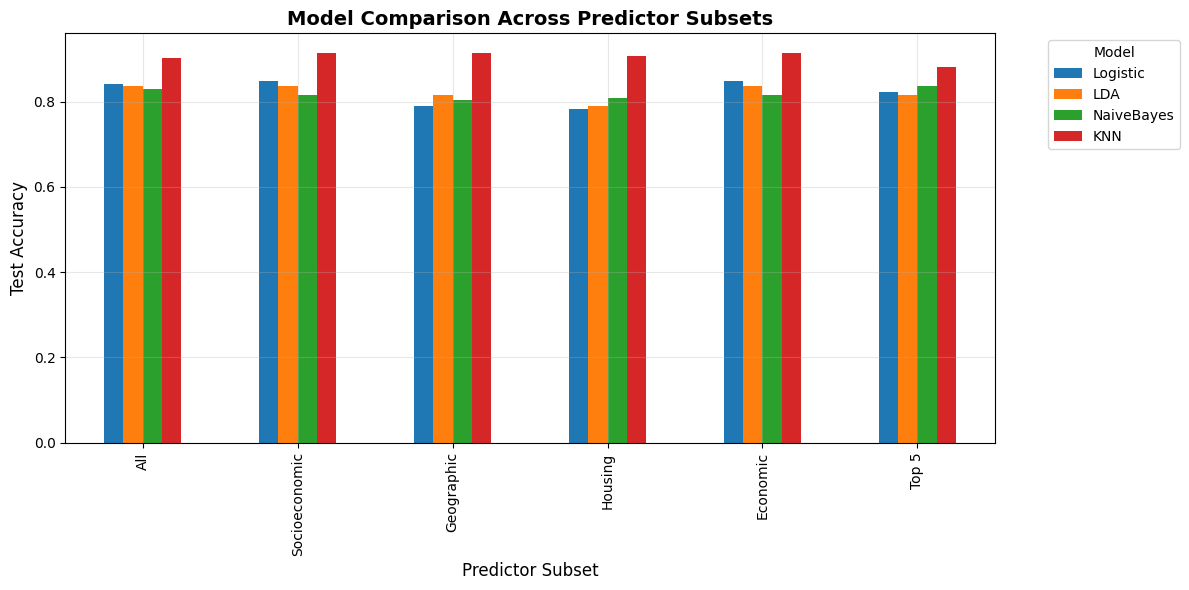

In [124]:
# Create a results DataFrame for visualization
results_df = pd.DataFrame(results).T
print(results_df)

# Visualize results
fig, ax = subplots(figsize=(12, 6))
results_df.plot(kind='bar', ax=ax)
ax.set_title('Model Comparison Across Predictor Subsets', fontsize=14, fontweight='bold')
ax.set_xlabel('Predictor Subset', fontsize=12)
ax.set_ylabel('Test Accuracy', fontsize=12)
ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [125]:
# Feature importance from logistic regression (using all predictors)
logreg_all = LogisticRegression(random_state=42, max_iter=1000)
logreg_all.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': logreg_all.coef_[0],
    'abs_coefficient': np.abs(logreg_all.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print("Feature Importance (Logistic Regression):")
print(feature_importance)

# Correlation analysis
correlations = Boston.corr()['crim'].sort_values(key=abs, ascending=False)
print("\nCorrelations with Crime Rate:")
print(correlations)

Feature Importance (Logistic Regression):
    feature  coefficient  abs_coefficient
3       nox     3.096922         3.096922
7       rad     2.312238         2.312238
0        zn    -0.948293         0.948293
6       dis     0.491943         0.491943
11     medv     0.462534         0.462534
4        rm     0.388143         0.388143
5       age     0.253471         0.253471
10    lstat     0.165654         0.165654
1     indus    -0.162252         0.162252
9   ptratio     0.151625         0.151625
8       tax    -0.135346         0.135346
2      chas     0.099433         0.099433

Correlations with Crime Rate:
crim          1.000000
rad           0.625505
tax           0.582764
lstat         0.455621
nox           0.420972
high_crime    0.409395
indus         0.406583
medv         -0.388305
dis          -0.379670
age           0.352734
ptratio       0.289946
rm           -0.219247
zn           -0.200469
chas         -0.055892
Name: crim, dtype: float64
